In [1]:
! wget https://www.seattleix.net/statistics/six_agg_bits_1min.rrd -O Traffic-Dataset/six_dataset.rrd

--2020-04-28 14:21:09--  https://www.seattleix.net/statistics/six_agg_bits_1min.rrd
Resolving www.seattleix.net (www.seattleix.net)...3.16.240.102, 3.20.148.210, 3.135.181.230, ...
Connecting to www.seattleix.net (www.seattleix.net)|3.16.240.102|:443...connected.
HTTP request sent, awaiting response...200 OK
Length: 1187488 (1.1M) [application/octet-stream]
Saving to: ‘Traffic-Dataset/six_dataset.rrd’

Traffic-Dataset/six 100%[===================>]   1.13M  1.59MB/s    in 0.7s    

2020-04-28 14:21:11 (1.59 MB/s) - ‘Traffic-Dataset/six_dataset.rrd’ saved [1187488/1187488]



In [2]:
! rrdtool dump Traffic-Dataset/six_dataset.rrd Traffic-Dataset/six_dataset.xml

! python Traffic-Dataset/rrdcsv.py Traffic-Dataset/six_dataset.xml 0 > Traffic-Dataset/six_dataset.csv

In [3]:
import datetime
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

HISTORY_DAYS = 7
AVG_SECONDS = 60

In [4]:
df = pd.read_csv(r'Traffic-Dataset/six_dataset.csv', index_col=0)

df.index = pd.to_datetime(df.index, unit='s')
print(df.shape)
df.head(5)

(11000, 2)


,ds0,ds1
2020-04-20 22:57:00,1.523564e+11,1.531953e+11
2020-04-20 22:58:00,1.549425e+11,1.550220e+11
2020-04-20 22:59:00,1.533317e+11,1.535449e+11
2020-04-20 23:00:00,1.555089e+11,1.549624e+11
2020-04-20 23:01:00,1.555446e+11,1.554170e+11


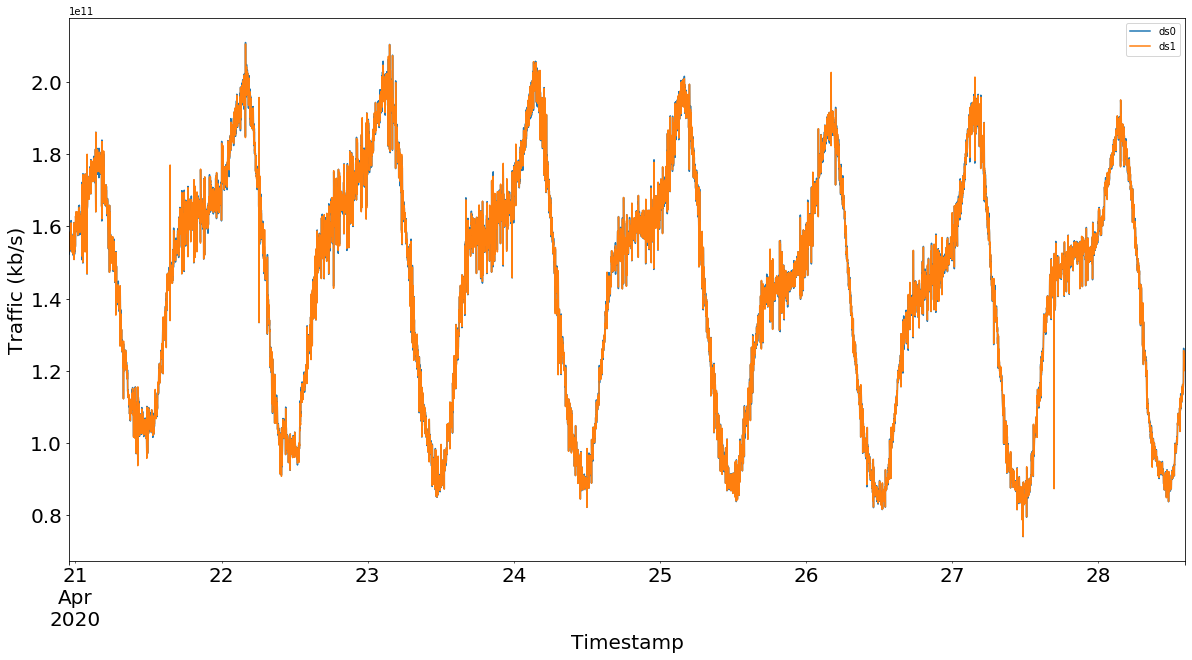

In [5]:
ax = df.plot(figsize=(20,10), fontsize=20)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Traffic (kb/s)", fontsize=20)
fig = ax.get_figure()

In [6]:
_DATARATE_MIN, _DATARATE_MAX = 0, 2000

'''
Interpolate data points to a certain range
'''
def interpolate_array(values, min=_DATARATE_MIN, max=_DATARATE_MAX):
    return np.interp(values, (values.min(), values.max()), (min, max))

df = pd.read_csv(r'Traffic-Dataset/six_dataset.csv', index_col=0)

df.index = pd.to_datetime(df.index, unit='s')
df = df.drop('ds1', axis=1)

df['sent'] = interpolate_array(df['ds0'])
df = df.drop('ds0', axis=1)

print(df.shape)
df.head(5)

(11000, 1)


,sent
2020-04-20 22:57:00,1143.842358
2020-04-20 22:58:00,1181.595847
2020-04-20 22:59:00,1158.080520
2020-04-20 23:00:00,1189.863609
2020-04-20 23:01:00,1190.384826


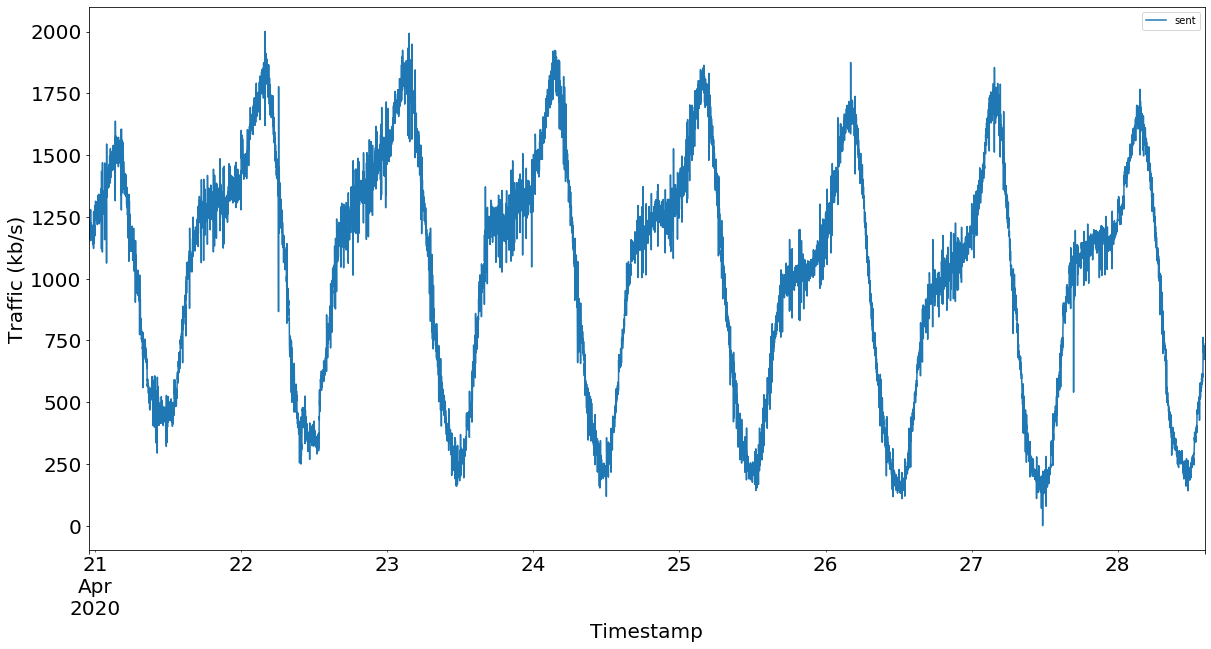

In [7]:
ax = df.plot(figsize=(20,10), fontsize=20)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Traffic (kb/s)", fontsize=20)
fig = ax.get_figure()


In [8]:
# Save Dataframe
df.to_csv('./data/dataset_six_traffic.csv')

In [11]:
df['sent']
df = df[:2880]

print(df.shape)
df.head(5)

(2880, 1)


,sent
2020-04-20 22:57:00,1143.842358
2020-04-20 22:58:00,1181.595847
2020-04-20 22:59:00,1158.080520
2020-04-20 23:00:00,1189.863609
2020-04-20 23:01:00,1190.384826


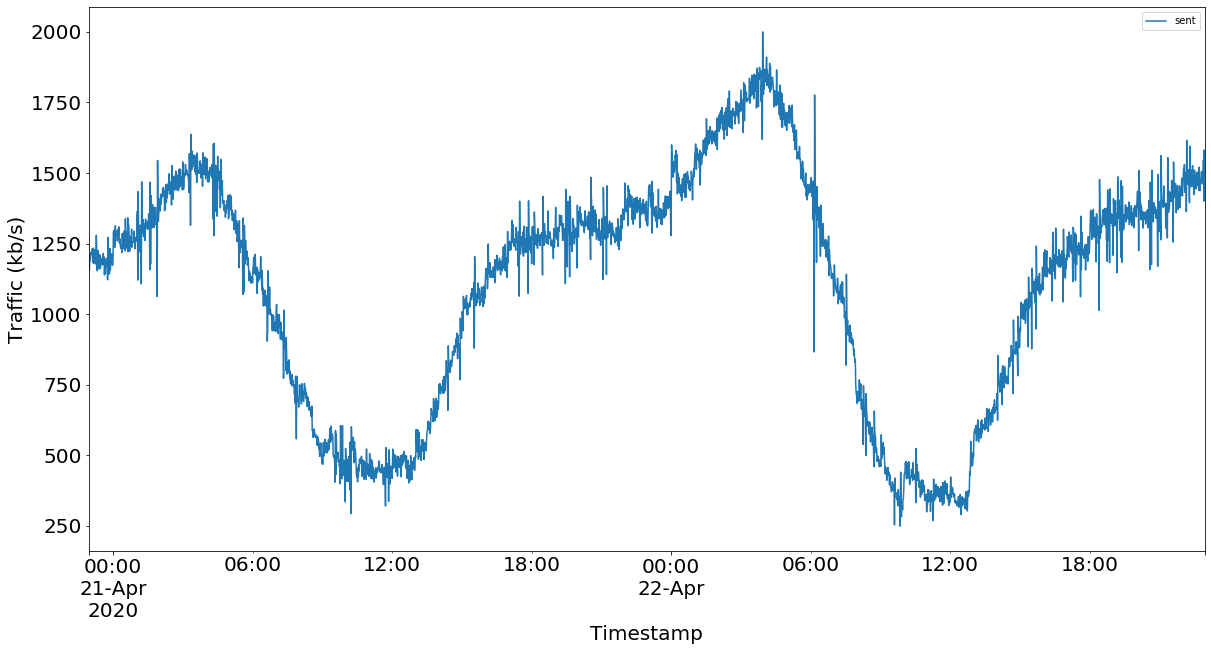

In [12]:
ax = df.plot(figsize=(20,10), fontsize=20)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Traffic (kb/s)", fontsize=20)
fig = ax.get_figure()